# Optimizing eBay Sales with Predictive Analytics: 
###  Analysing Trends and Forecasting Future Performance!

![image.png]()

# 1. Business Understanding

### Overview

eBay is an eCommerce platform that operates as an online marketplace where individuals and businesses can buy and sell a wide variety of products, including electronics, fashion, collectibles, home goods, and more.

**Stakeholders**
The primary stakeholders in this project include:
- Executive Leadership (eBay C-Suite): They require accurate sales forecasts to make informed decisions about resource allocation and market positioning.
- Inventory Management Team: They need accurate predictions to avoid stockouts or overstocks, which can lead to lost sales or excess inventory costs.
- Marketing Team:  They need to understand sales trends to time campaigns effectively and allocate budget to the most promising opportunities.
- Finance Department: Accurate sales forecasts are critical for their planning processes, ensuring that revenue projections align with actual business performance.
- Investors: They rely on accurate sales predictions to gauge the company's future performance, which influences their investment decisions and perceptions of eBay's market value.

### Problem Statement
In the highly competitive eCommerce landscape, accurately predicting sales is crucial for optimizing inventory management, marketing strategies, and overall business performance. eBay, as a major online marketplace, experiences significant fluctuations in sales due to various factors including seasonal trends, promotional activities, market demand, and external economic conditions.
> **The challenge** fluctuations in sales due to various factors including seasonal trends, promotional activities, market demand, and external economic conditions. This leads to poor decision-making, Inefficient resource allocation, and poor financial planning.

### Objectives 
**Main objective**: To create a model that predicts eBay sales accurately. This will help with better inventory management, marketing, and financial planning by using past sales data and other factors to make informed business decisions.

**Specific Objectives**: 
- Develop a predictive model capable of forecasting eBay sales with a high degree of accuracy on a weekly or monthly basis.
- Demonstrate the practical application of the predictive model in optimizing inventory management by reducing stockouts and overstocks. 
- Identify opportunities for targeted marketing campaigns based on predicted sales trends.

### Success Metric

Evaluate the performance of the predictive model using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE)

### Conclusion

By developing and implementing a robust predictive model, eBay can significantly enhance its ability to forecast sales, optimize inventory management, and make data-driven marketing decisions.

# 2. Data Understanding

**Data Collection**
Source: Yahoo Finance via yfinance API.

**Data Components**

**Historical Stock Prices:** Includes Open, High, Low, Close prices, and Volume of trades.These key features provide a snapshot of a stock's performance on any given trading day:
- Open: It is the first price at which a transaction is made in that stock during the day.
- High: The highest price at which the stock traded during the day. 
- Low: The lowest price at which the stock traded during the day. 
- Close: The final price at which the stock traded when the market closed. 
- Volume: The total number of shares traded during the day. 

**Additional Features:** Adjusted Close prices for accounting for corporate actions like stock splits and dividends.
The Adjusted Close price adjusts the closing price to reflect the impact of corporate actions like dividends, stock splits, and new stock issuance. This feature is essential for long-term analysis because it provides a more accurate picture of a stock’s value over time.
- Dividends: When a company pays out dividends to its shareholders, the stock price typically drops by the dividend amount. The Adjusted Close accounts for this, ensuring that historical price data remains consistent and comparable.
- Stock Splits: In a stock split, a company increases the number of its shares without changing the market value of the company. For instance, in a 2-for-1 split, the stock price is halved, but the number of shares doubles. The Adjusted Close adjusts for this, so the price before and after the split can be compared directly.

In [69]:
#Uncomment the line below only if you have not installed yfinance in your current env

# !pip install yfinance

In [70]:
# Import necessary libraries
import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Define the ticker symbol for eBay
ticker_symbol = 'EBAY'

# Fetch historical market data for eBay
ebay_data = yf.Ticker(ticker_symbol)

# Get historical data (you can specify the period and interval)
historical_data = ebay_data.history(period='max', interval='1d')

# Save the historical data to a CSV file
historical_data.to_csv('ebay_historical_data.csv')

#print the first few rows to confirm
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-09-24 00:00:00-04:00,0.855242,0.867232,0.707373,0.757329,518656090,0.0,0.0
1998-09-25 00:00:00-04:00,0.727356,0.737347,0.657418,0.717364,121255834,0.0,0.0
1998-09-28 00:00:00-04:00,0.759328,0.813279,0.735349,0.771317,89772883,0.0,0.0
1998-09-29 00:00:00-04:00,0.789300,0.803288,0.763324,0.781308,39289536,0.0,0.0
1998-09-30 00:00:00-04:00,0.754331,0.767320,0.691388,0.720361,44113766,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,55.000000,56.650002,54.560001,55.919998,4492200,0.0,0.0
2024-08-07 00:00:00-04:00,56.279999,56.779999,55.049999,55.110001,4871300,0.0,0.0
2024-08-08 00:00:00-04:00,55.509998,56.000000,55.150002,55.939999,2640200,0.0,0.0


In [72]:
# Load the data
data = pd.read_csv('ebay_historical_data.csv')

In [73]:
# check dataset structure
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1998-09-24 00:00:00-04:00,0.855242,0.867232,0.707373,0.757329,518656090,0.0,0.0
1,1998-09-25 00:00:00-04:00,0.727356,0.737347,0.657418,0.717364,121255834,0.0,0.0
2,1998-09-28 00:00:00-04:00,0.759328,0.813279,0.735349,0.771317,89772883,0.0,0.0
3,1998-09-29 00:00:00-04:00,0.789300,0.803288,0.763324,0.781308,39289536,0.0,0.0
4,1998-09-30 00:00:00-04:00,0.754331,0.767320,0.691388,0.720361,44113766,0.0,0.0


In [74]:
data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6507,2024-08-06 00:00:00-04:00,55.000000,56.650002,54.560001,55.919998,4492200,0.0,0.0
6508,2024-08-07 00:00:00-04:00,56.279999,56.779999,55.049999,55.110001,4871300,0.0,0.0
6509,2024-08-08 00:00:00-04:00,55.509998,56.000000,55.150002,55.939999,2640200,0.0,0.0
6510,2024-08-09 00:00:00-04:00,56.000000,56.740002,55.860001,56.520000,2952200,0.0,0.0
6511,2024-08-12 00:00:00-04:00,56.750000,57.130001,55.500000,55.665001,2586150,0.0,0.0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6512 non-null   object 
 1   Open          6512 non-null   float64
 2   High          6512 non-null   float64
 3   Low           6512 non-null   float64
 4   Close         6512 non-null   float64
 5   Volume        6512 non-null   int64  
 6   Dividends     6512 non-null   float64
 7   Stock Splits  6512 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 407.1+ KB


In [76]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [77]:
# Display basic statistics of the dataset

data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6512.000000,6512.000000,6512.000000,6512.000000,6.512000e+03,6512.000000,6512.000000
mean,21.542702,21.834136,21.264987,21.549864,3.273904e+07,0.000666,0.001747
std,15.735588,15.914990,15.572800,15.740828,3.350646e+07,0.011737,0.063948
min,0.445605,0.467586,0.403642,0.463589,2.129200e+06,0.000000,0.000000
25%,9.361307,9.507098,9.191836,9.347878,9.878725e+06,0.000000,0.000000
50%,16.074399,16.311309,15.848999,16.080153,2.586217e+07,0.000000,0.000000
75%,31.876176,32.196878,31.558775,31.843640,4.350082e+07,0.000000,0.000000
max,76.652449,76.860714,75.639516,76.292702,5.776987e+08,0.270000,3.000000


__Overview__

- The dataset contains columns such as Date, Open, High, Low, Close, Volume, Dividends, and Stock Splits.
- 
The data spans from 1998 and includes daily stock prices and volumes
- 
The Dividends and Stock Splits columns mostly contain zeros, indicating that these events are rare.

# 3. Data Preparation

We'll move on to the Data Preparation step, where we'll clean and prepare the data for modeling.

This will include:
- handling missing values
- feature engineering
- and splitting the data into training and testing sets.

Let's proceed with that.

In [78]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)

In [79]:
# data = data.set_index('Date')

Then, we will set the date as the index so as to allow easier time-based operations as well as manipulations of the data.

This step also ensures that feature engineering, and modeling efforts are more streamlined and effective.

In [80]:
# Check for missing values

data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [81]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


We are then going to drop columns that are not needed for modeling

Assuming 'Dividends' and 'Stock Splits' are not needed due to their low variance

In [82]:
data = data.drop(['Dividends', 'Stock Splits'], axis=1)

data.head()

,Date,Open,High,Low,Close,Volume
0,1998-09-24 04:00:00+00:00,0.855242,0.867232,0.707373,0.757329,518656090
1,1998-09-25 04:00:00+00:00,0.727356,0.737347,0.657418,0.717364,121255834
2,1998-09-28 04:00:00+00:00,0.759328,0.813279,0.735349,0.771317,89772883
3,1998-09-29 04:00:00+00:00,0.789300,0.803288,0.763324,0.781308,39289536
4,1998-09-30 04:00:00+00:00,0.754331,0.767320,0.691388,0.720361,44113766


## Feature Engineering

Let's create a 'Year' and 'Month' column from the 'Date'

In [83]:
data['Year'] = data['Date'].dt.year

data['Month'] = data['Date'].dt.month

# check dataset structure again

data.head()

,Date,Open,High,Low,Close,Volume,Year,Month
0,1998-09-24 04:00:00+00:00,0.855242,0.867232,0.707373,0.757329,518656090,1998,9
1,1998-09-25 04:00:00+00:00,0.727356,0.737347,0.657418,0.717364,121255834,1998,9
2,1998-09-28 04:00:00+00:00,0.759328,0.813279,0.735349,0.771317,89772883,1998,9
3,1998-09-29 04:00:00+00:00,0.789300,0.803288,0.763324,0.781308,39289536,1998,9
4,1998-09-30 04:00:00+00:00,0.754331,0.767320,0.691388,0.720361,44113766,1998,9


## Visualization

Let's create a visualizaton of the historical closing prices over time prices

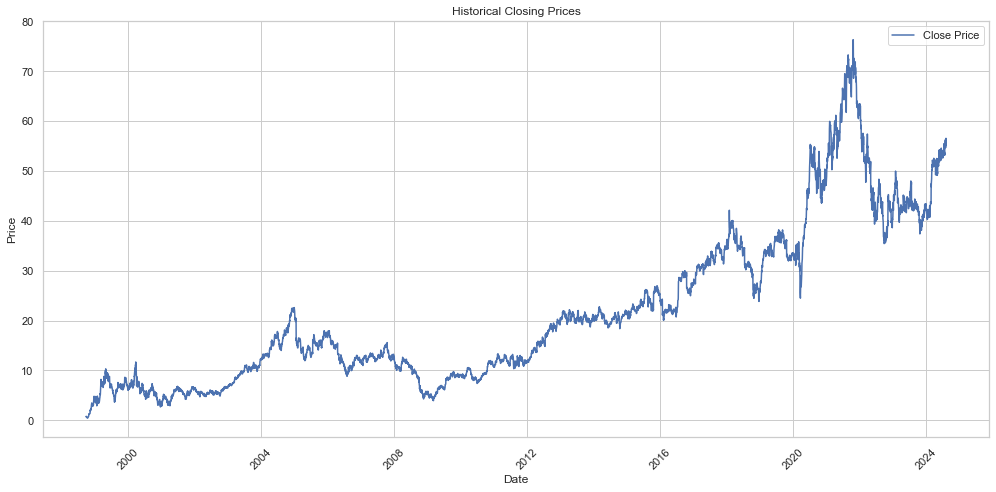

In [84]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Plot the closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's further analyze the data by calculating the moving average to smooth out the price trends.

We will calculate a 30-day moving average and plot it alongside the closing prices.

The 30-day moving average line provides a more stable view of the market trend, reducing the noise from daily price changes. It can be used to identify potential support and resistance levels, as well as to signal potential trend reversals.

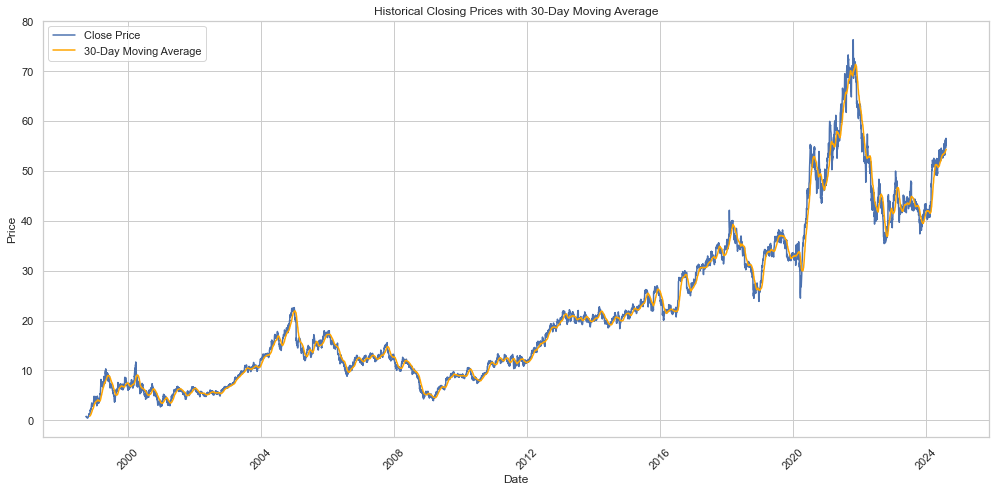

In [85]:
# Calculate the 30-day moving average
moving_average_30 = data['Close'].rolling(window=30).mean()

# Plot the closing prices and the 30-day moving average
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], moving_average_30, label='30-Day Moving Average', color='orange')
plt.title('Historical Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

__Overview__

The closing prices exhibit volatility, with noticeable peaks and troughs. This suggests that the market has experienced periods of rapid change, which could be due to various economic factors or events.

# Modeling

For this modelling section, we will explore multiple suitable models and then choose the most appropriate model depending of various evaluation criteria.

The step by step process involved will include:

1. Split the data
2. Train different models
3. Evaluate and compare models
4. Select the best model
5. Fine-tune the chosen model

Let's go through each of the steps:


#### Split the data

First, we need to split our prepared dataset into training and testing sets. This is crucial for evaluating our models' performance on unseen data.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Define features and target variable
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train different models

Data preprocessing is completed. Now, let's proceed with training different models. We'll start with a few common models for time series prediction:

- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

Let's train these models and evaluate their performance.

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm

In [88]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
class StockPriceModel:
    def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
        self.trained_model = None

    def train(self, X_train, y_train):
        print(f"Training {self.model_name}...")
        self.trained_model = self.model.fit(X_train, y_train)
        print(f"{self.model_name} trained successfully.")

    def evaluate(self, X_test, y_test):
        predictions = self.trained_model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"{self.model_name} Results:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        return mse, r2

    def cross_validate(self, X, y, cv=5):
        print(f"Performing {cv}-fold cross-validation for {self.model_name}...")
        scores = cross_val_score(self.model, X, y, cv=cv, scoring='neg_mean_squared_error')
        print(f"Cross-validation MSE scores: {-scores}")
        print(f"Average MSE: {-scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

In [90]:
# Initialize models
models = [
    StockPriceModel(LinearRegression(), 'Linear Regression'),
    StockPriceModel(RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest'),
    StockPriceModel(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42), 'XGBoost'),
    StockPriceModel(SVR(kernel='rbf'), 'Support Vector Regression')
]

In [91]:
# Train, evaluate, and cross-validate each model
results = []
for model in tqdm(models, desc="Training and evaluating models"):
    model.train(X_train_scaled, y_train)
    mse, r2 = model.evaluate(X_test_scaled, y_test)
    model.cross_validate(X_train_scaled, y_train)
    results.append((model.model_name, mse, r2))

Training and evaluating models:  25%|██▌       | 1/4 [00:00<00:00,  9.70it/s]

Training Linear Regression...
Linear Regression trained successfully.
Linear Regression Results:
Mean Squared Error: 0.0394
R-squared Score: 0.9998
Performing 5-fold cross-validation for Linear Regression...
Cross-validation MSE scores: [0.03089838 0.03636147 0.03697228 0.03539908 0.03821343]
Average MSE: 0.0356 (+/- 0.0050)
Training Random Forest...
Random Forest trained successfully.
Random Forest Results:
Mean Squared Error: 0.0779
R-squared Score: 0.9997
Performing 5-fold cross-validation for Random Forest...


Training and evaluating models:  50%|█████     | 2/4 [00:06<00:03,  1.99s/it]

Cross-validation MSE scores: [0.06322246 0.06142925 0.07996804 0.07088159 0.0744286 ]
Average MSE: 0.0700 (+/- 0.0138)
Training XGBoost...
XGBoost trained successfully.
XGBoost Results:
Mean Squared Error: 0.0818
R-squared Score: 0.9997
Performing 5-fold cross-validation for XGBoost...


Training and evaluating models:  75%|███████▌  | 3/4 [00:07<00:01,  1.74s/it]

Cross-validation MSE scores: [0.0709799  0.06842415 0.08971707 0.08180951 0.07612092]
Average MSE: 0.0774 (+/- 0.0154)
Training Support Vector Regression...
Support Vector Regression trained successfully.
Support Vector Regression Results:
Mean Squared Error: 1.0097
R-squared Score: 0.9960
Performing 5-fold cross-validation for Support Vector Regression...


Training and evaluating models: 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]

Cross-validation MSE scores: [0.71589912 1.98748884 0.91802106 0.59799771 0.58528007]
Average MSE: 0.9609 (+/- 1.0540)


# Evaluation

Model comparison plot saved as 'model_comparison.png'


<Figure size 864x432 with 0 Axes>

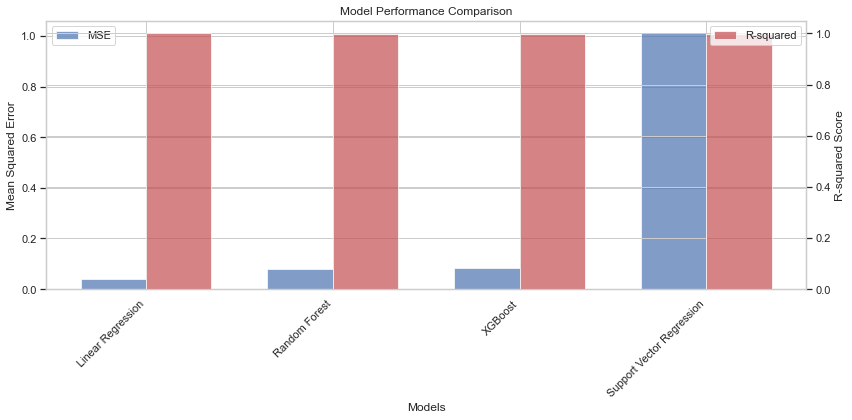

In [92]:
# Plot the results
plt.figure(figsize=(12, 6))
model_names = [result[0] for result in results]
mse_scores = [result[1] for result in results]
r2_scores = [result[2] for result in results]

x = np.arange(len(model_names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

rects1 = ax1.bar(x - width/2, mse_scores, width, label='MSE', color='b', alpha=0.7)
rects2 = ax2.bar(x + width/2, r2_scores, width, label='R-squared', color='r', alpha=0.7)

ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax2.set_ylabel('R-squared Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.savefig('model_comparison.png')
print("Model comparison plot saved as 'model_comparison.png'")

In [93]:
# Find the best model
best_model = min(results, key=lambda x: x[1])
print(f"\
Best performing model: {best_model[0]}")
print(f"MSE: {best_model[1]:.4f}")
print(f"R-squared: {best_model[2]:.4f}")

Best performing model: Linear Regression
MSE: 0.0394
R-squared: 0.9998


# Conclusion and Recommendation